In [0]:
from google.colab import files
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import metrics

In [20]:
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Group_FILL-predictions.xz to Group_FILL-predictions.xz
User uploaded file "Group_FILL-predictions.xz" with length 19696 bytes


In [28]:
stage_dict = {0:'Arousal', 1:'NREM1', 2:'NREM2', 3:'NREM3', 4:'REM'}
test_pred = pd.read_pickle('Group_FILL-predictions.xz')
test_predict = test_pred.idxmax(axis=1)
test_labels = pd.read_pickle('TEST_LABELS.xz')
test_labels_one_hot = pd.DataFrame(np.eye(5)[test_labels.values.reshape(1000).astype(int)])
acc=0
for i, j in enumerate(test_predict):
  if test_labels['Label'][i]==j:
    acc+=1
print(acc/len(test_labels))

0.444


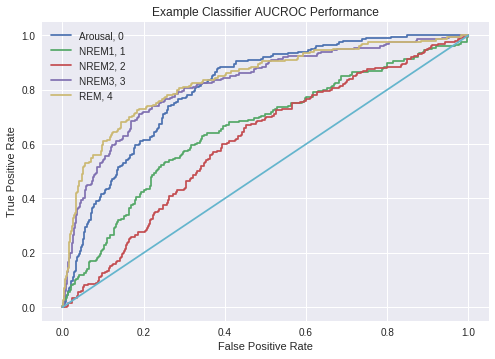

In [32]:
fpr = {}
tpr = {}
roc_auc = {}
for i in range(5):
  fpr[i], tpr[i], _ = metrics.roc_curve(test_labels_one_hot.iloc[:, i], test_pred.iloc[:, i])
  roc_auc[i] = metrics.auc(fpr[i], tpr[i])
  plt.plot(fpr[i], tpr[i], label = stage_dict[i] + ', ' + str(i))
plt.plot([0, 1], [0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC Curve')
plt.legend()
plt.show()

fpr["micro"], tpr["micro"], _ = metrics.roc_curve(test_labels_one_hot.values.ravel(), test_pred.values.ravel())
roc_auc = metrics.auc(fpr["micro"], tpr["micro"])

In [0]:
y_true = []
y_pred = []
for i in range(1000):
  if test_predict.iloc[i]==0:
    y_pred.append(1)
  else:
    y_pred.append(-1)
  if test_labels.iloc[i][0]==0:
    y_true.append(1)
  else:
    y_true.append(-1)
mcc = metrics.matthews_corrcoef(y_true, y_pred)

In [24]:
print(roc_auc, mcc)

0.75461675 0.3529314508531586
